In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

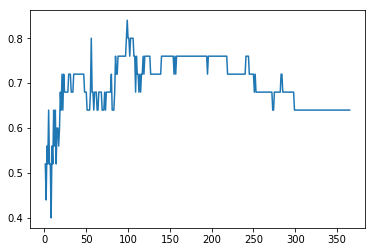


365


In [44]:
np.random.seed(420)
songs = pd.read_csv('training_data.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
classify_songs =  pd.read_csv('songs_to_classify.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
#Dividing training data using crossfold
randomize_indices = np.random.choice(songs.shape[0], songs.shape[0], replace=False) 
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
m = 365
folds = 30
correctness = []

for j in range(folds):
    n=np.ceil(songs.shape[0]/folds)
    validationIndex=np.arange(j*n, min(j*n+n,songs.shape[0]), 1).astype('int')
    randomize_validationIndex = randomize_indices[validationIndex]
    train = dummies.iloc[~dummies.index.isin(randomize_validationIndex)]
    test = dummies.iloc[dummies.index.isin(randomize_validationIndex)]  
    xTrain = train.drop(columns=['label','index'])
    yTrain = train['label']
    xTest = test.drop(columns=['label','index'])
    yTest = test['label']
    

    for k in range(m): 
        knn = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
        knn.fit(xTrain, yTrain)
        pred = knn.predict(xTest)
        correctness.append(np.mean(pred==yTest))
avgCorr = []
for i in range(m):
    avgCorr.append(np.mean(correctness[i]))
K = np.linspace(1, m, m)
plt.plot(K, avgCorr)
plt.show()
print(avgCorr.index(max(avgCorr)))
print(max(avgCorr))

In [45]:
print(avgCorr.index(max(avgCorr)))
print(max(avgCorr))

98
0.84


In [36]:
#mygel
#optimal neighbors = 99
trainI = np.random.choice(songs.shape[0],size=750, replace=False)
trainIndex = songs.index.isin(trainI)
train = songs.iloc[trainIndex]
test = songs.iloc[~trainIndex]
#Training data
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
train = dummies.iloc[trainIndex]
xTrain = train.drop(columns=['label','index'])
yTrain = train['label']
knn = skl_nb.KNeighborsClassifier(n_neighbors=99)

knn.fit(xTrain,yTrain)

dummies = pd.get_dummies(classify_songs, columns=['key','time_signature'])
classSongs = dummies.drop(columns=['index'])

pred = knn.predict(classSongs)
print(pred)

[0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1]


In [38]:
string = np.array2string(pred)
string.replace(" ", "")

'[0111011110110100011110011001101011001\n1101011100111111101111111101110111111\n1101000110111011111111111110111111111\n0100010101111011010111111110010111110\n1011100011111011101111111101001111110\n111111011110011]'

In [41]:
01110111101101000111100110011010110011101011100111111101111111101110111111110100011011101111111111111011111111101000101011110110101111111100101111101011100011111011101111111101001111110111111011110011

SyntaxError: invalid token (<ipython-input-41-68a3ddaaa269>, line 1)